# The regrid functionalities

As usual, let's import the Reader to retrieve the necessary dataset.

In [1]:
from aqua import Reader

In order to regrid the data, wee need to specify while we instanciate the Reader class, which is the target resolution we want to regrid the data to. The regrid method will then take care of the rest.

It is possible to specify the interpolation method to be used. The default is 'ycon', but it can be changed using the CDO syntax with the `regrid_method` argument of the Reader.

The syntax for the target resolution is the following:

- r005: r7200x3600
- r010: r3600x1800
- r020: r1800x900
- r025: r1440x720
- r050: r720x360
- r100: r360x180
- r200: r180x90
- r250: r144x72

In [2]:
reader = Reader(model="ERA5", exp="era5", source="monthly", regrid="r100")
data = reader.retrieve()

At this stage, the Reader did check that the weights are already computed, but it did not regrid our data yet. This is done by calling the regrid method.

In [3]:
data_r = reader.regrid(data)
data_r

<xarray.Dataset> Size: 25GB
Dimensions:     (time: 1008, lat: 180, lon: 360, plev: 8)
Coordinates:
  * time        (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * plev        (plev) float64 64B 1e+05 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
Data variables: (12/20)
    avg_siconc  (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mer         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msl         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...          ...
    mtpr        (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtnswrf     (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtnlwrf     (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u           (time, plev, lat, lon) float64 4GB dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    v           (time, plev, lat, lon) float64 4GB dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    avg_tos     (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 08 07:32:40 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

As we can see from the dimensions, our dataset is now regridded to the target resolution.

## Accessories and Reader methods

While describing the regrid functionalities we can introduce the possibilities of AQUA to be used as accessor of a dataset retrieved with the Reader class.

Similarly to xarray, we can directly call methods while using an accessor. The accessor is the object that allows us to call the methods.

Let's analyze the line of code that we used to regrid the data:

```python
data_r = reader.regrid(data)
```

We needed to call the regrid method of the Reader class, passing the dataset as argument. This is the standard way to call a method of a class.

However, we can also use the accessor to call the method directly on the dataset. This is done by calling the method on the accessor, which is the object that allows us to call the methods.

In [4]:
data_r = data.aqua.regrid()
data_r

<xarray.Dataset> Size: 25GB
Dimensions:     (time: 1008, lat: 180, lon: 360, plev: 8)
Coordinates:
  * time        (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * plev        (plev) float64 64B 1e+05 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
Data variables: (12/20)
    avg_siconc  (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mer         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msl         (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...          ...
    mtpr        (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtnswrf     (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtnlwrf     (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u           (time, plev, lat, lon) float64 4GB dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    v           (time, plev, lat, lon) float64 4GB dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    avg_tos     (time, lat, lon) float64 523MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 08 07:32:40 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

The result is the same as above and the syntax is similar to what is done with xarray (with the additional .aqua accessor definition).

This allows to concatenate methods in a more readable way.

**ATTENTION**: the accessor will guess the Reader instance to use. If you're working with multiple instances, we suggest to avoid using the accessor and call the method directly on the Reader instance.

Let's plot a slice of the regridded data with accessors:

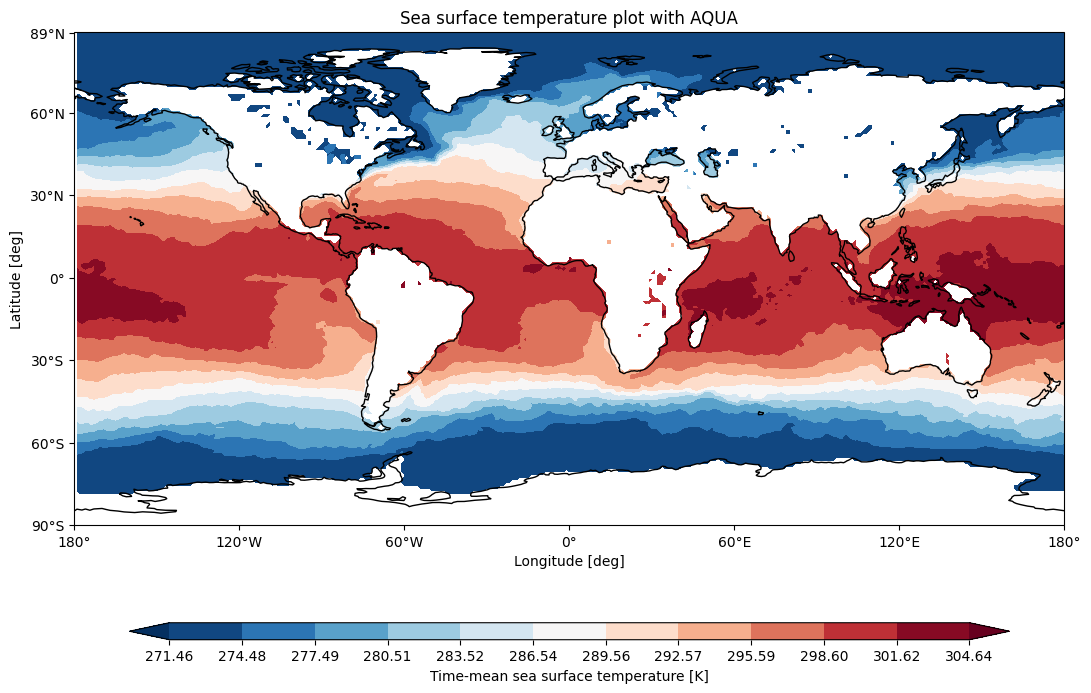

In [5]:
data['avg_tos'].isel(time=0).aqua.regrid().aqua.plot_single_map(transform_first=True, title = 'Sea surface temperature plot with AQUA')

Here we used the accessor to regrid data (notice how in this case we didn't use any argument for the reader method, it is inferred by the accessor) and then we used the accessor to plot a slice of the data. Extra argument, as shown in the plot function, can be passed to the accessors.

## Vertical regrid

Together with the horizontal regrid, AQUA also provides the possibility to regrid the data in the vertical dimension.

In [67]:
reader = Reader(model="ERA5", exp="era5", source="monthly", regrid="r250")
data = reader.retrieve(var=['u', 'v'], startdate='2010-01-01', enddate='2010-01-01')

Don't worry about the errors. The variables without units are supposed to be dimensionless, but we raise an error to make sure the user is aware if an unexpected variable is found.

We exploit 3D regridding and we create a more practical dataset.

Please be aware for oceanic dataset (or any masked component) that it is mandatory to interpolate on the horizontal grid before interpolating on the vertical axis, while this should not be necessary for atmospheric datasets. This is because weights for regridding are available on the original vertical levels, and in the ocean this will not work if you move to a different vertical level. On the other hand, for the atmosphere weights are not dependent on the vertical level so the operation can be done in any order.

In [68]:
data

<xarray.Dataset> Size: 66MB
Dimensions:  (time: 1, plev: 8, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8B 2010-01-01
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * plev     (plev) float64 64B 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
Data variables:
    u        (time, plev, lat, lon) float32 33MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    v        (time, plev, lat, lon) float32 33MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 08 07:32:40 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

Let's check the original levels of the dataset:

In [69]:
data.plev

<xarray.DataArray 'plev' (plev: 8)> Size: 64B
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 64B 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
Attributes:
    standard_name:  air_pressure
    long_name:      pressure
    units:          Pa
    positive:       down
    axis:           Z

Let's ask for a level not present in the original dataset and let's plot it:

In [70]:
data_r = reader.regrid(data)
data_r = reader.vertinterp(data, levels=[90000])

2024-09-04 17:38:53 :: Reader :: WARNING  -> Units of vert_coord=plev has not defined, reading from the data


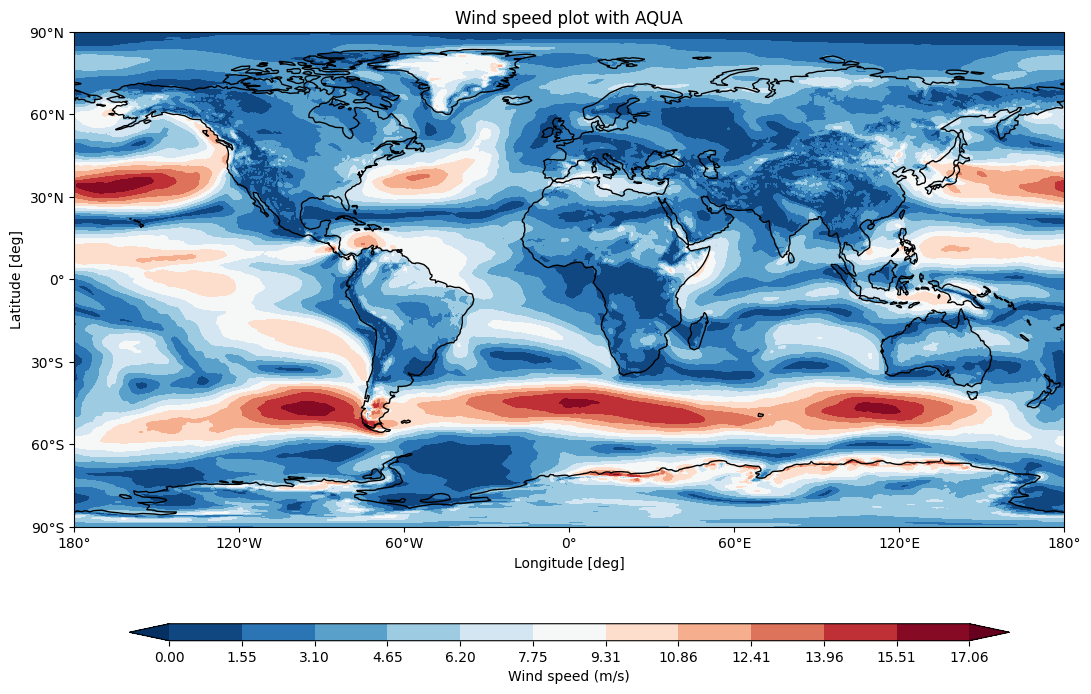

In [90]:
#Total wind speed
data_r['wind_speed'] = (data_r['u']**2 + data_r['v']**2)**0.5

data_r['wind_speed'].isel(time=0, plev=0).aqua.plot_single_map(cbar_label='Wind speed (m/s)',
                                                               title='Wind speed plot with AQUA')

The vertical interpolation is done with a linear interpolation.